In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
db = pd.read_csv('StudentsPerformanceTest.csv')
db

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [3]:
db.head()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune


In [4]:
db.tail()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [5]:
db.describe()

,writing score,Placement Score,placement offer count
count,8.000000,8.000000,9.000000
mean,77.000000,62.125000,1.777778
std,13.416408,23.295846,1.201850
min,52.000000,12.000000,0.000000
25%,72.250000,53.500000,1.000000
50%,76.500000,72.000000,2.000000
75%,88.250000,78.000000,2.000000
max,93.000000,81.000000,4.000000


In [7]:
db.dtypes

gender                    object
math score                object
reading score             object
writing score            float64
Placement Score          float64
placement offer count      int64
Region                    object
dtype: object

In [23]:
db['reading score'].replace(['na','Na'],[0,100], inplace=True)
db['math score'].replace(['na','NaN'],[400,400], inplace=True)

0     72.0
1     69.0
2     90.0
3     47.0
4    400.0
5     71.0
6     12.0
7      NaN
8      5.0
Name: math score, dtype: float64

In [19]:
db['math score']=db['math score'].astype('float64')

In [20]:
db['math score']

0     72.0
1     69.0
2     90.0
3     47.0
4    400.0
5     71.0
6     12.0
7      NaN
8      5.0
Name: math score, dtype: float64

In [29]:
db.dropna()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72,74.0,78.0,1,Pune
2,female,90.0,95,93.0,74.0,2,Nashik
4,male,400.0,78,75.0,81.0,3,Pune
5,female,71.0,100,78.0,70.0,4,na
6,male,12.0,44,52.0,12.0,2,Nashik


<Axes: xlabel='math score'>

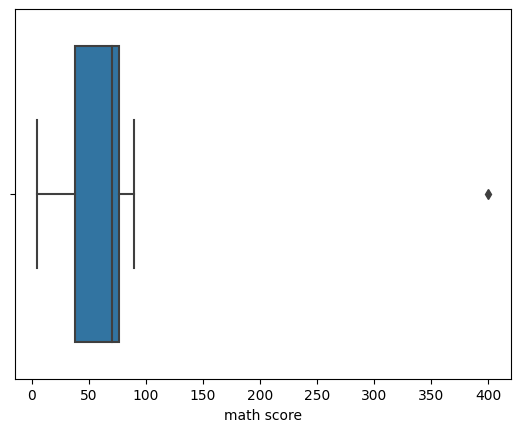

In [31]:
sns.boxplot(data=db,x='math score')

In [35]:
Q1 = np.percentile(db['math score'],25, interpolation='midpoint')
Q3 = np.percentile(db['math score'],75, interpolation='midpoint')

IQ = Q3-Q1

upper = np.where(db['math score']>=(Q3+1.25*IQ))
lower = np.where(db['math score']<=(Q1-1.25*IQ))

outliers = [x for x in db['math score'] if x < lower or x > upper]
data_no_outliers = [x for x in db['math score'] if x >= lower and x <= upper]

C:\Users\jaikrishna\AppData\Local\Temp\ipykernel_17952\3677571683.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(db['math score'],25, interpolation='midpoint')
C:\Users\jaikrishna\AppData\Local\Temp\ipykernel_17952\3677571683.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(db['math score'],75, interpolation='midpoint')


TypeError: '<' not supported between instances of 'float' and 'tuple'